In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=1000)
data = np.append(data, [100, 110, 120])

In [3]:
df = pd.DataFrame(data, columns=['Value'])

# Five Number Summary

In [4]:
def five_number_summary(data):
    summary = {
        'Minimum': np.min(data),
        'Q1': np.percentile(data, 25),
        'Median': np.median(data),
        'Q3': np.percentile(data, 75),
        'Maximum': np.max(data)
    }
    return summary

In [5]:
summary = five_number_summary(data)
print("Five-Number Summary:", summary)

Five-Number Summary: {'Minimum': 17.58732659930927, 'Q1': 43.54153680576175, 'Median': 50.26885838994531, 'Q3': 56.5079621463223, 'Maximum': 120.0}


# Box Plot

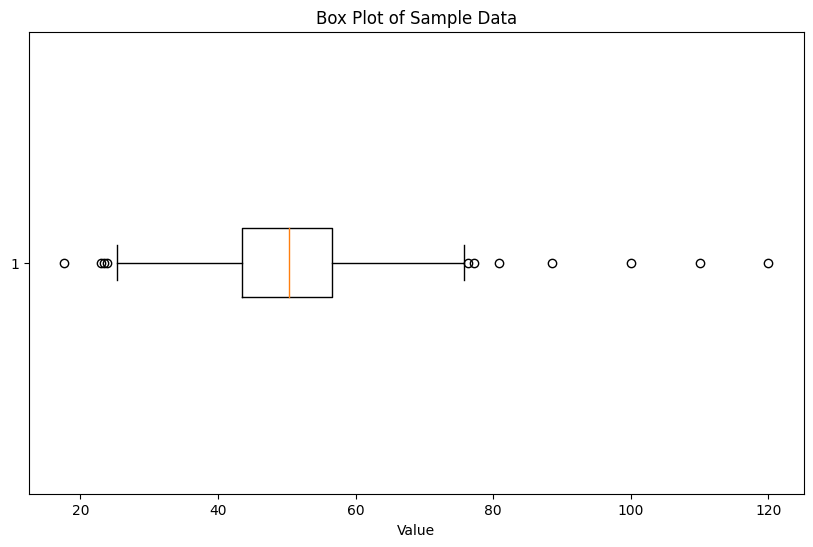

In [6]:
plt.figure(figsize=(10, 6))
plt.boxplot(data, vert=False)
plt.title('Box Plot of Sample Data')
plt.xlabel('Value')
plt.show()

# Z-Score Method

In [7]:
z_scores = stats.zscore(data)
outliers_z = data[(z_scores > 3) | (z_scores < -3)]
print("Outliers using Z-score method:", outliers_z)

Outliers using Z-score method: [ 88.52731491  17.5873266  100.         110.         120.        ]


# Percentile Method

In [8]:
p1 = np.percentile(data, 1)
p99 = np.percentile(data, 99)
outliers_percentile = data[(data < p1) | (data > p99)]
print("Outliers using Percentile method:", outliers_percentile)

Outliers using Percentile method: [ 23.80254896  74.63242112  77.20169167  88.52731491  17.5873266
  28.76104276  26.98078835  80.78880808  25.283555    27.88864691
  23.03113357  75.73359803  23.49030192  29.18070592  76.32382065
  75.60084538  75.26932426  28.01194043  25.76120673 100.
 110.         120.        ]


# IQR Method

In [10]:
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = data[(data < lower_bound) | (data > upper_bound)]

In [11]:
outliers_iqr

array([ 23.80254896,  77.20169167,  88.52731491,  17.5873266 ,
        80.78880808,  23.03113357,  23.49030192,  76.32382065,
       100.        , 110.        , 120.        ])


# Winsorization

In [12]:
from scipy.stats.mstats import winsorize
winsorized_data = winsorize(data, limits=[0.05, 0.05])
print("Winsorized Data:", winsorized_data)

Winsorized Data: [54.96714153 48.61735699 56.47688538 ... 67.52270443 67.52270443
 67.52270443]


# DBSCAN

In [13]:
from sklearn.cluster import DBSCAN
data_reshaped = data.reshape(-1, 1)

In [14]:
dbscan = DBSCAN(eps=3, min_samples=5)
labels = dbscan.fit_predict(data_reshaped)

In [15]:
outliers_dbscan = data[labels == -1]
print("Outliers using DBSCAN method:", outliers_dbscan)

Outliers using DBSCAN method: [ 88.52731491  17.5873266   80.78880808 100.         110.
 120.        ]


# Isolation Forest

In [16]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.01)
outliers_iso_forest = iso_forest.fit_predict(data_reshaped)

In [17]:
outliers_iso = data[outliers_iso_forest == -1]
print("Outliers using Isolation Forest method:", outliers_iso)

Outliers using Isolation Forest method: [ 23.80254896  88.52731491  17.5873266   80.78880808  25.283555
  23.03113357  23.49030192  25.76120673 100.         110.
 120.        ]



# Local Outlier Factor

In [18]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
outliers_lof = lof.fit_predict(data_reshaped)

In [19]:
outliers_lof = data[outliers_lof == -1]
print("Outliers using LOF method:", outliers_lof)

Outliers using LOF method: [ 23.80254896  77.20169167  88.52731491  17.5873266   80.78880808
  25.283555    23.03113357  23.49030192 100.         110.
 120.        ]


# Modified Z-Score

In [20]:
def modified_z_score(data):
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    modified_z_scores = 0.6745 * (data - median) / mad
    return modified_z_scores

mod_z_scores = modified_z_score(data)
outliers_mod_z = data[np.abs(mod_z_scores) > 3.5]
print("Outliers using Modified Z-score method:", outliers_mod_z)

Outliers using Modified Z-score method: [ 88.52731491 100.         110.         120.        ]
